# Getting insights into the CORONAVIRUS using time series
- Using the COVID-19 time series data from the Johns Hopkins University

In [1]:
from datetime import date, timedelta
import matplotlib.pyplot as plt
import pandas
import urllib.request

class hopkins_timeseries:
    def __init__(self, states, regions, timeseries):
        self.__states = states
        self.__regions = regions
        self.__timeseries = timeseries
    
    def get(self):
        return self.__timeseries
    
    def plot(self, names, last_days=60):
        height = 2 * len(names)
        if 0 < height:
            end_index = date.today()
            start_index = end_index-timedelta(days=last_days)
            self.__timeseries[start_index:end_index][names].plot(subplots=True, figsize=(15, height))
            
    def plot_all(self, data, last_days=60):
        height = 4 * len(data.columns)
        if 0 < height:
            end_index = date.today()
            start_index = end_index-timedelta(days=last_days)
            data.loc[start_index:end_index].plot(subplots=True, figsize=(15, height))
    
    def plot_regions(self, names, last_days=60):
        aggregated_regions = self.__aggregate_regions_by_sum(names)
        self.plot_all(aggregated_regions, last_days)
    
    def plot_states(self, names, last_days=60):
        states = self.__get_states(names)
        self.plot(states, last_days)
        
    def __aggregate_regions_by_sum(self, names):
        aggregated_timeseries = pandas.DataFrame()
        for name in names:
            states_from_region = self.__get_states_from_region(name)
            if 0 < len(states_from_region):
                aggregated_timeseries[name] = self.__timeseries[states_from_region].sum(axis=1)                
            elif name in self.__timeseries.columns:
                aggregated_timeseries[name] = self.__timeseries[name]
        return aggregated_timeseries
        
    def __get_states_from_region(self, name):
        states = []
        region_indices = [index for index in range(0, len(self.__regions)) if name == self.__regions[index]]
        for region_index in region_indices:
            state = self.__states[region_index]
            if pandas.notna(state):
                states.append(state)
        return states
    
    def __get_states(self, names):
        states = []
        for name in names:
            states_from_region = self.__get_states_from_region(name)
            if 0 < len(states_from_region):
                states += states_from_region
            else:
                state_indices = [index for index in range(0, len(self.__states)) if name == self.__states[index]]
                for state_index in state_indices:
                    state = self.__states[state_index]
                    if pandas.notna(state):
                        states.append(state)
        return states
        

def query_hopkins_timeseries():
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    with urllib.request.urlopen(url) as stream:
        timeseries_hopkins = pandas.read_csv(stream)
        date_columns = timeseries_hopkins.columns[4:]
        timeseries_indexed = timeseries_hopkins[date_columns].T
        timeseries_indexed.index = pandas.to_datetime(timeseries_indexed.index)
        states = timeseries_hopkins["Province/State"]
        regions = timeseries_hopkins["Country/Region"]
        timeseries_indexed.columns = [states[index] if 0 < pandas.notna(states[index]) else regions[index] for index in range(0, len(states))]
        return hopkins_timeseries(states, regions, timeseries_indexed)

In [2]:
corona_timeseries = query_hopkins_timeseries()

## Plot the time series

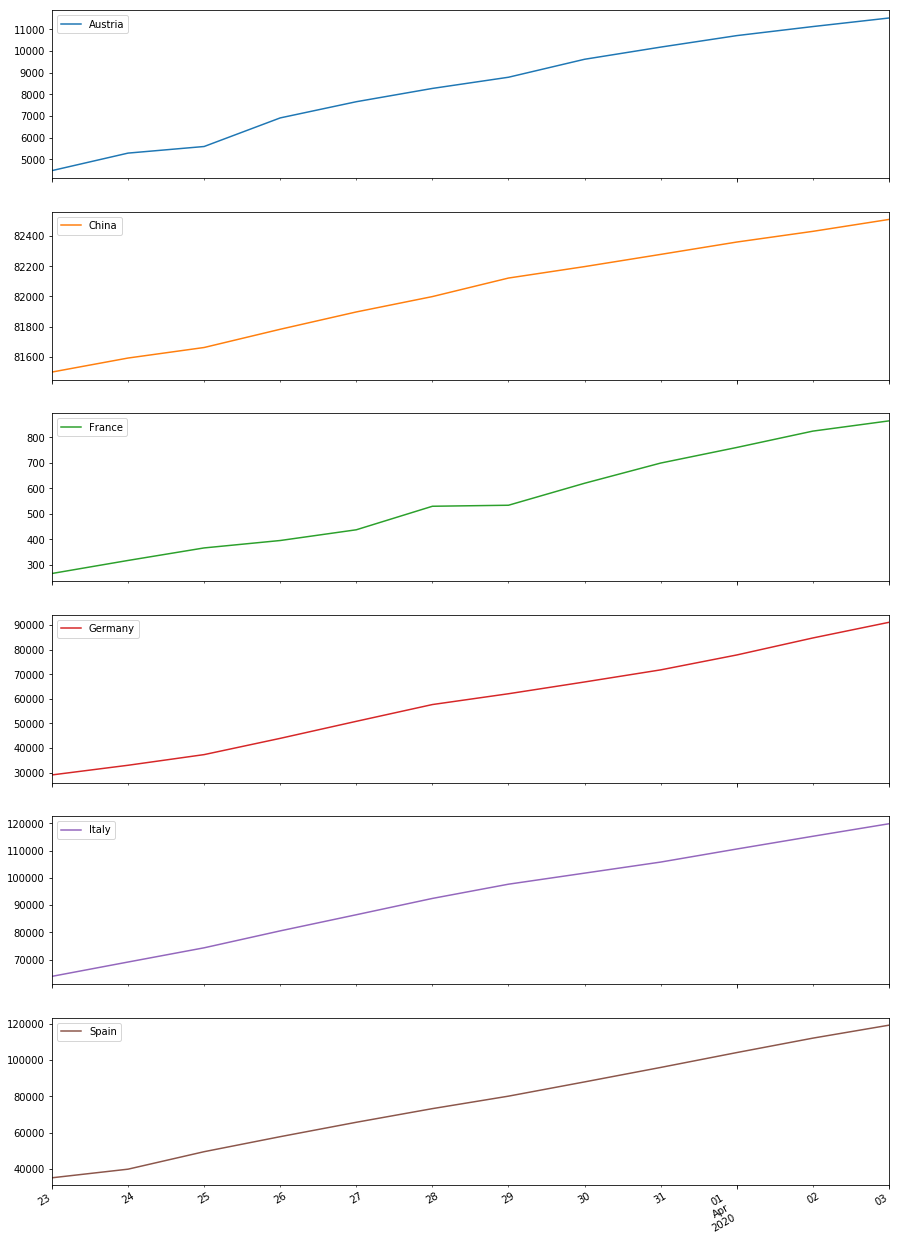

In [3]:
corona_timeseries.plot_regions(["Austria", "China", "France", "Germany", "Italy", "Spain"], last_days=12)